In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


In [38]:
data=pd.read_csv('housing.csv')

In [39]:
data.columns.tolist()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

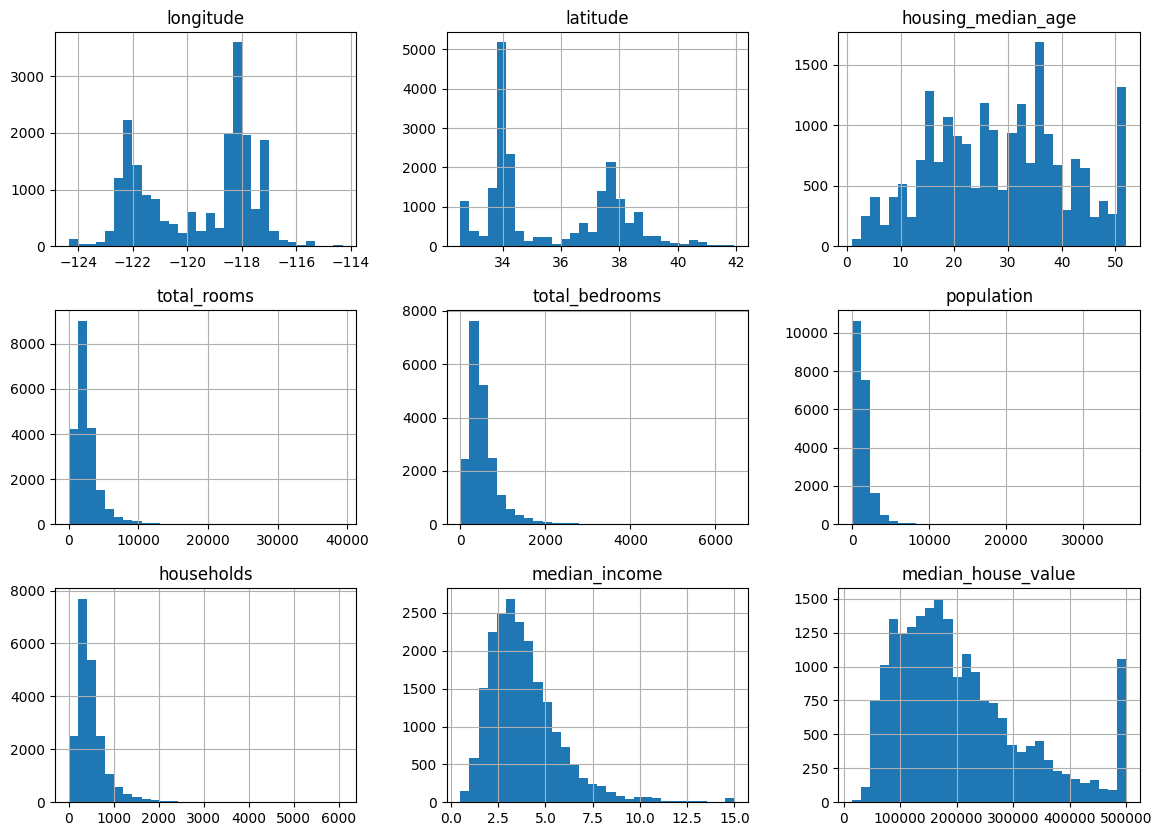

In [40]:
data.hist(bins=30,figsize=(14,10))
plt.show()

In [41]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
data["income_cat"] = np.ceil(data["median_income"] / 1.5)
data["income_cat"].where(data["income_cat"] < 5, 5.0, inplace=True)


In [42]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["income_cat"]):
 strat_train_set = data.loc[train_index]
 strat_test_set = data.loc[test_index]
for set in (strat_train_set, strat_test_set):
 set.drop(["income_cat"], axis=1, inplace=True)


In [43]:
housing=strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

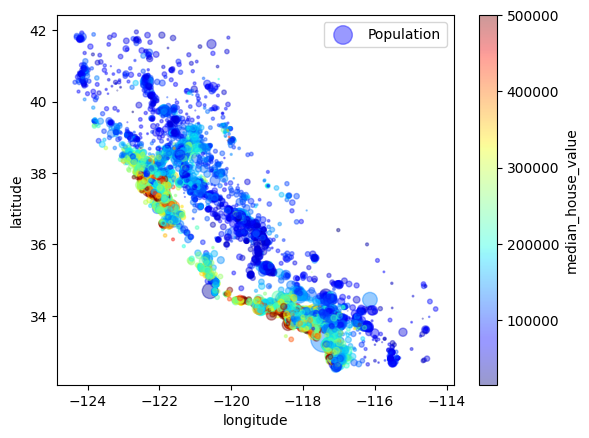

In [44]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=housing['population']/100,label='Population',c='median_house_value',
             cmap=plt.get_cmap('jet'))

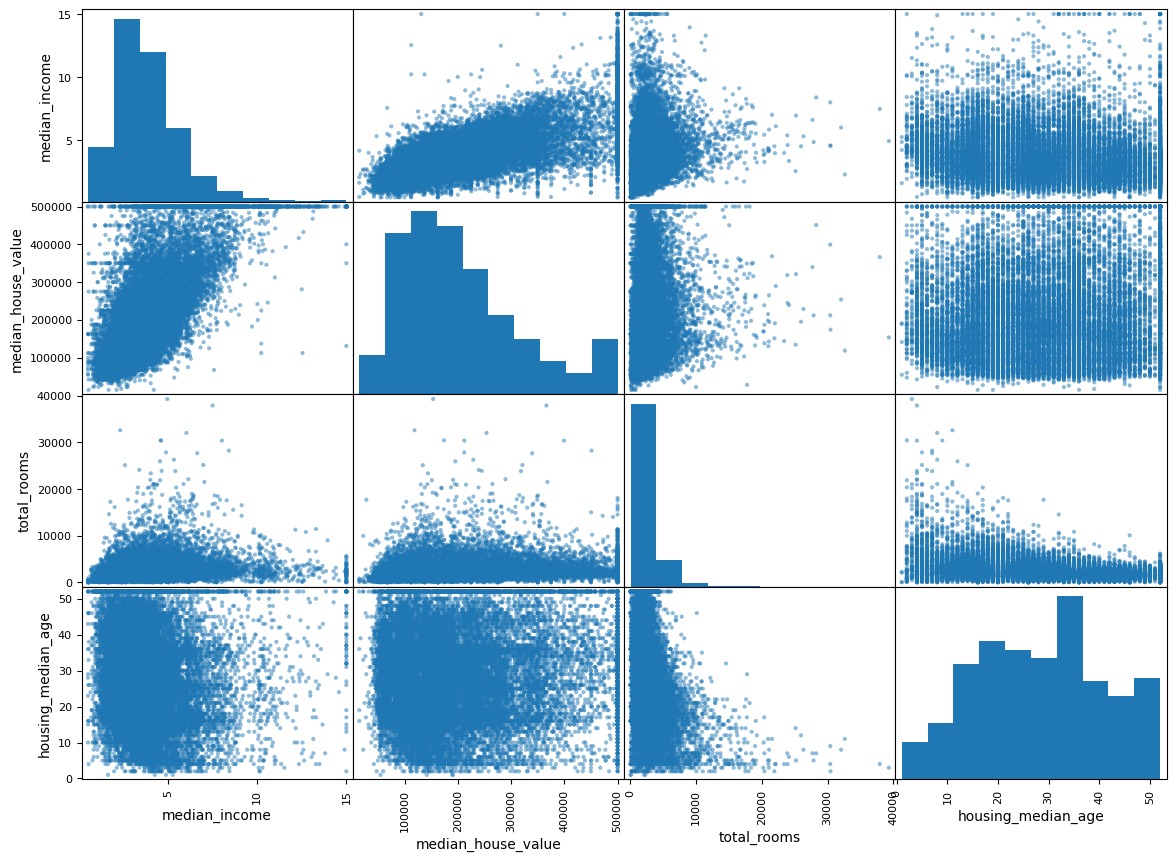

In [45]:
from pandas.plotting import scatter_matrix
attributes = ['median_income', 'median_house_value',
              'total_rooms', 'housing_median_age']
scatter_matrix(data[attributes],figsize=(14,10))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

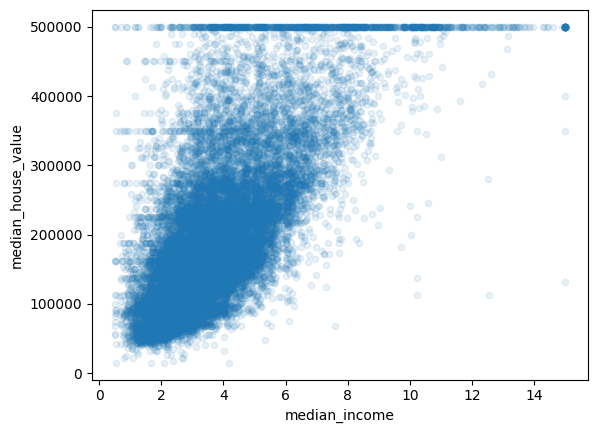

In [46]:
data.plot(kind='scatter',x="median_income", y="median_house_value",alpha=0.1)

In [47]:
from sklearn.impute import SimpleImputer
X = strat_train_set.drop("median_house_value", axis=1)
y = strat_train_set["median_house_value"].copy()
imputer = SimpleImputer(strategy="mean")
housing_num = data.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)


In [49]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = data["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_1hot
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



TypeError: 'SimpleImputer' object is not callable